In [24]:
import pandas as pd
import datetime
from sklearn.model_selection import train_test_split
import keras
from keras import Sequential
from keras.layers import Input
from keras.layers import Dense
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf

In [4]:
df_adra = pd.read_csv("Adra.csv", delimiter=";", na_values="n/d")

In [5]:
df_adra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8797 entries, 0 to 8796
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FECHA             8797 non-null   object 
 1   DIA               8797 non-null   int64  
 2   Al10TMax          8784 non-null   float64
 3   Al10TMin          8780 non-null   float64
 4   Al10TMed          8778 non-null   float64
 5   Al10HumMax        8790 non-null   float64
 6   Al10HumMin        8774 non-null   float64
 7   Al10HumMed        8785 non-null   float64
 8   Al10VelViento     8796 non-null   float64
 9   Al10VelVientoMax  8796 non-null   float64
 10  Al10Rad           8795 non-null   float64
 11  Al10Precip        8794 non-null   float64
 12  Al10ETo           8767 non-null   float64
dtypes: float64(11), int64(1), object(1)
memory usage: 893.6+ KB


In [6]:
df_adra

,FECHA,DIA,Al10TMax,Al10TMin,Al10TMed,Al10HumMax,Al10HumMin,Al10HumMed,Al10VelViento,Al10VelVientoMax,Al10Rad,Al10Precip,Al10ETo
0,28/10/24,302,24.3,10.5,16.9,91.5,41.8,59.3,2.3,8.1,4.4,5.0,2.6
1,27/10/24,301,19.1,10.8,13.7,90.8,56.0,78.4,1.4,5.7,6.1,1.8,1.6
2,26/10/24,300,22.3,13.4,17.8,91.0,29.8,61.6,3.6,11.0,16.0,5.6,3.9
3,25/10/24,299,23.4,17.0,19.8,90.5,67.5,81.5,1.5,4.6,14.0,0.2,2.2
4,24/10/24,298,25.2,16.9,20.6,91.7,44.8,71.0,1.1,4.0,15.5,0.0,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8792,10/09/00,254,27.7,19.3,22.9,87.1,37.3,66.7,2.1,7.5,22.6,0.0,4.9
8793,09/09/00,253,28.0,20.4,24.2,76.5,46.4,64.4,2.1,7.8,22.5,0.0,4.9
8794,08/09/00,252,28.9,19.5,24.8,88.9,28.2,65.0,1.7,7.0,22.2,0.0,4.9
8795,07/09/00,251,26.8,18.7,23.0,87.2,53.7,74.7,1.1,3.1,23.3,0.0,4.2


In [7]:
df_adra.dropna(inplace=True)

In [8]:
df_adra["FECHA"] = pd.to_datetime(df_adra["FECHA"], format="%d/%m/%y")

In [9]:
df_adra.set_index("FECHA", inplace=True)

In [57]:
#Temperatura, humedad, precipitacion
df_input_output = df_adra[[ "Al10TMed", "Al10HumMed",  "Al10VelViento", "Al10ETo"]]

In [58]:
df_train, df_val = train_test_split(df_input_output, train_size=0.8, random_state=123)

In [59]:
arr_train_inputs = df_train.to_numpy()[:,:-1]
arr_train_outputs = df_train.to_numpy()[:,-1]
arr_val_inputs = df_train.to_numpy()[:,:-1]
arr_val_outputs = df_train.to_numpy()[:,-1]

In [60]:
numero_inputs = arr_train_inputs.shape[1]
numero_outputs = 1

In [108]:
# decisiones en el proceso de modelado
numero_de_neuronas_capa_oculta= 150
function_activation="relu"
uso_bias = True
funcion_entrenamiento ="adam"
loss_funcion= "mse"
list_metrics = ["mae","mape"]
batch_size = 32
numero_de_epocas = 50

In [109]:
#Modelo 
model = Sequential()
model.add(Input(shape=(3,), name= "capa_entrada"))
model.add(Dense(units=numero_de_neuronas_capa_oculta, activation=function_activation, name="capa_oculta1",use_bias=True))
model.add(Dense(units=numero_de_neuronas_capa_oculta, activation=function_activation, name="capa_oculta2",use_bias=True))
model.add(Dense(units=numero_outputs, name="capa_salida"))

In [110]:

model.compile(
    optimizer=funcion_entrenamiento,
    loss=loss_funcion,
    metrics=list_metrics

)

In [111]:
history_object =model.fit(
                    arr_train_inputs,
                    arr_train_outputs,
                    batch_size=batch_size,
                    validation_data=(arr_val_inputs, arr_val_outputs),
                    epochs=numero_de_epocas
)

Epoch 1/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 4.7881 - mae: 1.4586 - mape: 56.2553 - val_loss: 1.0004 - val_mae: 0.7984 - val_mape: 24.2063
Epoch 2/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7961 - mae: 0.7342 - mape: 26.4452 - val_loss: 0.7684 - val_mae: 0.7287 - val_mape: 28.5557
Epoch 3/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7825 - mae: 0.7325 - mape: 26.3283 - val_loss: 0.7014 - val_mae: 0.6960 - val_mape: 25.3680
Epoch 4/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.8281 - mae: 0.7465 - mape: 27.4930 - val_loss: 1.0667 - val_mae: 0.8222 - val_mape: 24.3298
Epoch 5/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.8334 - mae: 0.7460 - mape: 27.1399 - val_loss: 0.8474 - val_mae: 0.7450 - val_mape: 23.4453
Epoch 6/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.8354 - mae: 0.7476 - mape: 27.4306 - val_loss: 0.7011 - val_mae: 0.6966 - val_mape: 25.6506
Epoch 7/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.8925 - mae: 0.

In [112]:
dict_resultado_historico = history_object.history

In [113]:
x_values = history_object.epoch
y_entrenamiento = dict_resultado_historico["loss"]
y_validacion = dict_resultado_historico["val_loss"]

<function matplotlib.pyplot.show(close=None, block=None)>

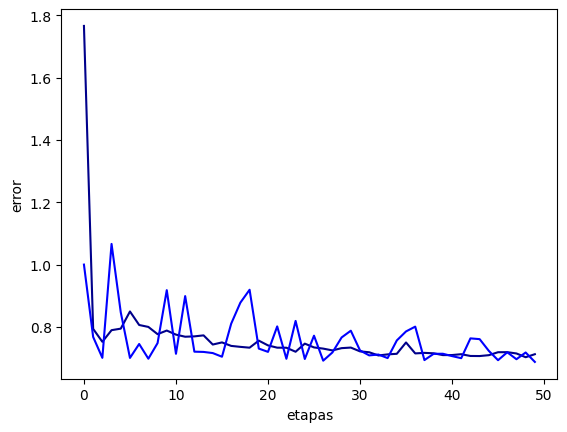

In [114]:
plt.plot(x_values, y_entrenamiento, label="Entrenamiento", c="darkblue")
plt.plot(x_values, y_validacion, label="validación" ,c="blue")

plt.xlabel("etapas")
plt.ylabel("error")
plt.legend
plt.show


